In [2]:
import sqlite3
import numpy as np
from matplotlib import pyplot as plt
from larch import Group
from larch.xafs import pre_edge, autobk, xftf, xftr

In [19]:
mean298, std298 = np.loadtxt('/mnt/sdcc/hpcgpfs01/scratch/nmarcella/240102/Pt309_cuboct_298K_result.dat').T
mean148, std148 = np.loadtxt('/mnt/sdcc/hpcgpfs01/scratch/nmarcella/240102/Pt309_cuboct_148K_result.dat').T

In [28]:
mean298_noCO, std298_noCO = np.loadtxt('/mnt/sdcc/sdcc+u/nmarcella/HTFC/Pt309_cuboct_298K_noCO_result.dat').T

In [34]:
group = Group()
kspace = np.linspace(0, 20, 401)
group.k = kspace
group.chi = mean298
xftf(group, kweight = 2, kmin = 2, kmax = 12, dk = 2, window = 'hanning')

In [20]:
group2 = Group()
kspace = np.linspace(0, 20, 401)
group2.k = kspace
group2.chi = mean148
xftf(group2, kweight = 2, kmin = 2, kmax = 12, dk = 2, window = 'hanning')

In [29]:
group3 = Group()
kspace = np.linspace(0, 20, 401)
group3.k = kspace
group3.chi = mean298_noCO
xftf(group3, kweight = 2, kmin = 2, kmax = 12, dk = 2, window = 'hanning')

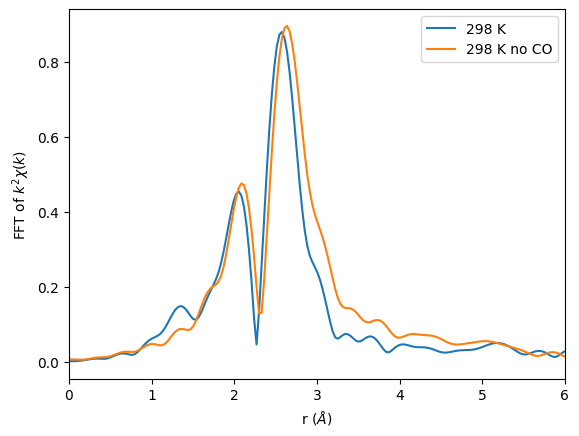

In [36]:
plt.plot(group.r, group.chir_mag, label = '298 K')
#plt.plot(group2.r, group2.chir_mag, label = '148 K')
plt.plot(group3.r, group3.chir_mag, label = '298 K no CO')
plt.xlim(0, 6)
plt.xlabel("r ($Å$)")
plt.ylabel("FFT of $k^2\chi(k)$")
plt.legend()

In [13]:
def plot_wavelet_transform(f):

    # Pre-process data
    #autobk(f, rbkg=1, kweight=2) 
    xftf(f, kweight=2, kmin=2, kmax=12, dk=2, window='hanning')
    cauchy_wavelet(f, kweight=2)


    k_values = f.k 
    r_values = f.wcauchy_r
    data = f.wcauchy_mag
    data_re = f.wcauchy_re

    r_projection = np.sum(data, axis=1)/6 
    k_projection = np.sum(data_re, axis=0)

    fig = plt.figure(figsize=(12, 10))
    gs = fig.add_gridspec(2, 2, width_ratios=[1, 4], height_ratios=[4, 1],  
                          hspace=0.15, wspace=0.15)

    # Main contour plot
    ax_main = fig.add_subplot(gs[0, 1])
    cp = ax_main.contourf(k_values, r_values, data, cmap='viridis')

    ax_main.set_title('Wavelet transform')

    # Projection plot for R
    ax_r_proj = fig.add_subplot(gs[0, 0], sharey=ax_main)
    ax_r_proj.plot(r_projection, r_values, label="R projection")
    ax_r_proj.invert_xaxis()

    # Projection plot for K 
    ax_k_proj = fig.add_subplot(gs[1, 1], sharex=ax_main)
    ax_k_proj.plot(k_values, k_projection, label="K projection") 
    ax_k_proj.invert_yaxis()

    # Add true data
    ax_k_proj.plot(f.k, f.chi*f.k**2, label="raw data")
    ax_r_proj.plot(f.chir_mag, f.r, label="raw data")

    # Labels
    ax_k_proj.set_xlabel(r'$K (\AA^{-1})$')
    ax_k_proj.set_ylabel(r'$k^2\chi(k) \, (\AA^{-2})$')
    ax_r_proj.set_xlabel(r'$|\chi(R)| \, (\AA^{-3})$')
    ax_r_proj.set_ylabel(r'$R \, (\AA)$')

    ax_k_proj.legend()
    ax_r_proj.legend()
    fig.tight_layout()

    return fig, ax_main, ax_r_proj, ax_k_proj

In [15]:
from larch.xafs import cauchy_wavelet

(<Figure size 1200x1000 with 3 Axes>,
 <Axes: title={'center': 'Wavelet transform'}>,
 <Axes: xlabel='$|\\chi(R)| \\, (\\AA^{-3})$', ylabel='$R \\, (\\AA)$'>,
 <Axes: xlabel='$K (\\AA^{-1})$', ylabel='$k^2\\chi(k) \\, (\\AA^{-2})$'>)

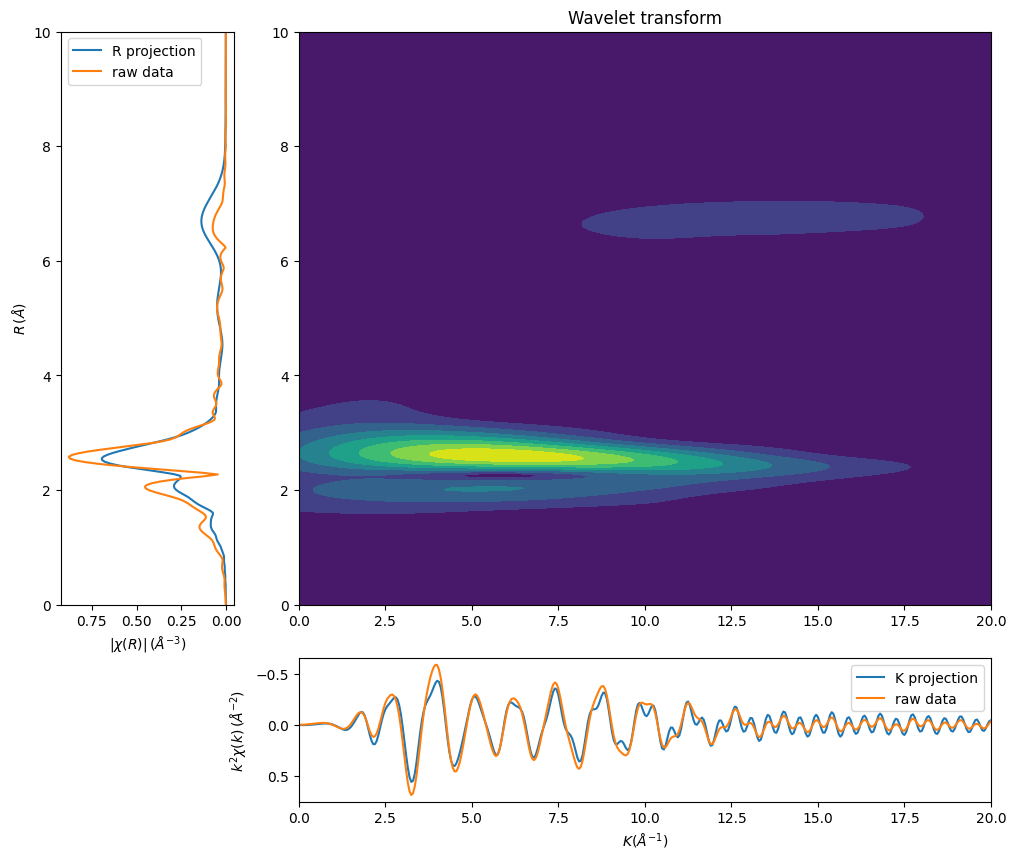

In [35]:
plot_wavelet_transform(group)

(<Figure size 1200x1000 with 3 Axes>,
 <Axes: title={'center': 'Wavelet transform'}>,
 <Axes: xlabel='$|\\chi(R)| \\, (\\AA^{-3})$', ylabel='$R \\, (\\AA)$'>,
 <Axes: xlabel='$K (\\AA^{-1})$', ylabel='$k^2\\chi(k) \\, (\\AA^{-2})$'>)

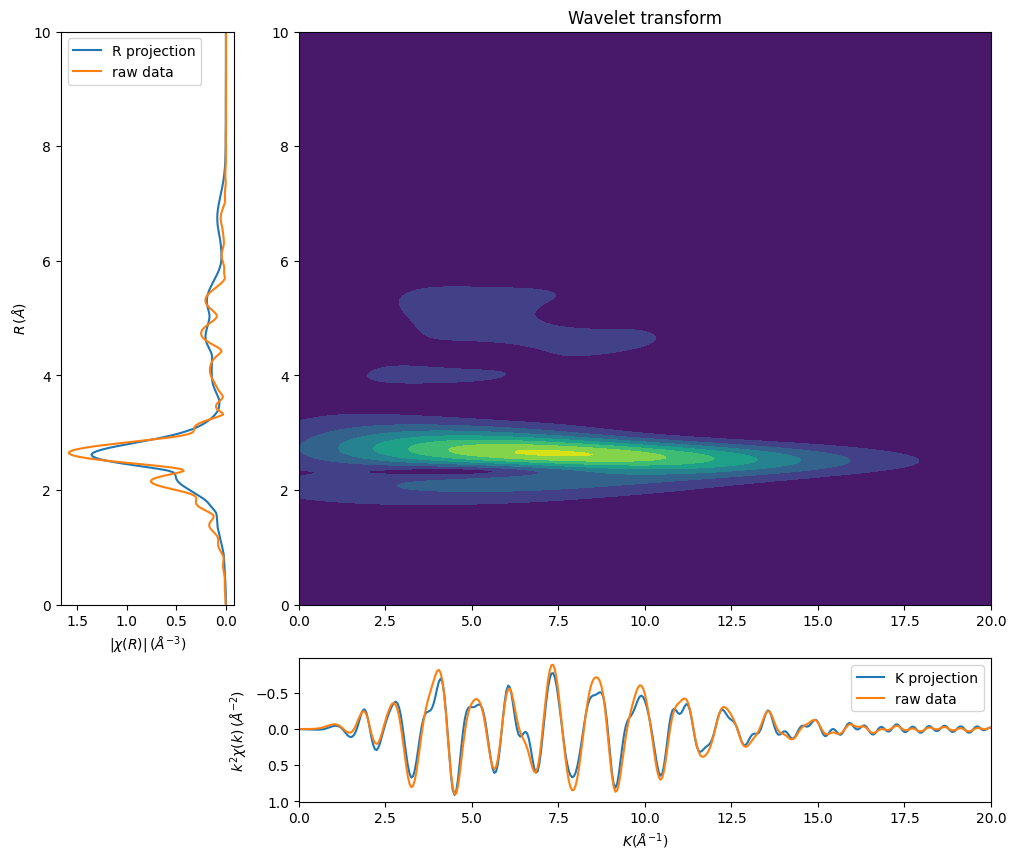

In [22]:
plot_wavelet_transform(group2)

(<Figure size 1200x1000 with 3 Axes>,
 <Axes: title={'center': 'Wavelet transform'}>,
 <Axes: xlabel='$|\\chi(R)| \\, (\\AA^{-3})$', ylabel='$R \\, (\\AA)$'>,
 <Axes: xlabel='$K (\\AA^{-1})$', ylabel='$k^2\\chi(k) \\, (\\AA^{-2})$'>)

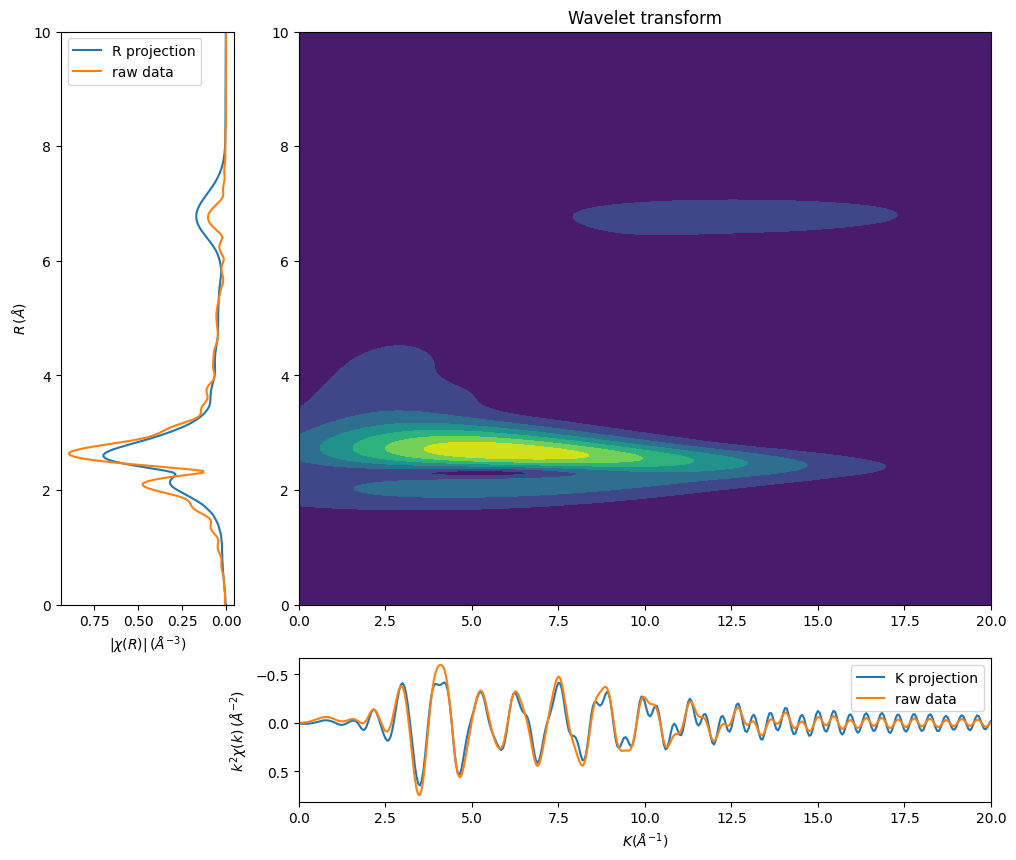

In [33]:
plot_wavelet_transform(group3)